Job Placement Prediction Model


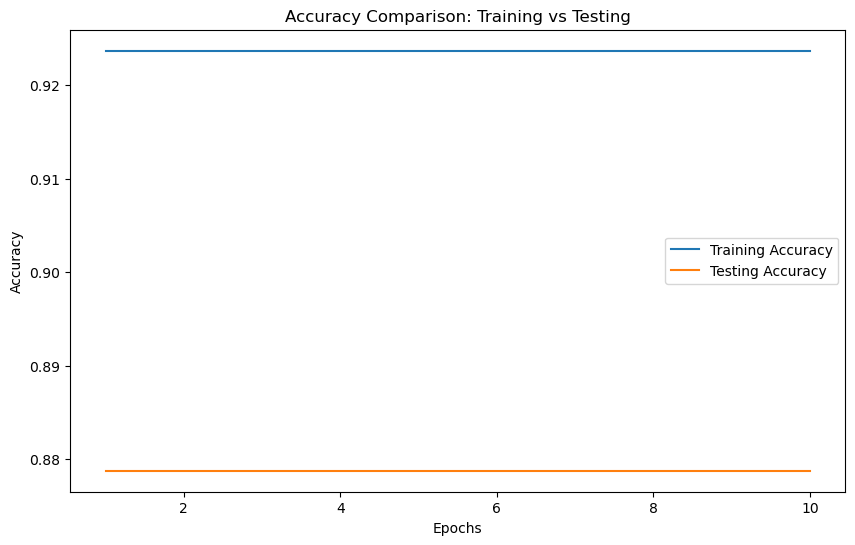

User Input
Enter Age: 22
Enter Gender: 0
Enter Stream: 3
Enter Internships: 1
Enter CGPA: 8
Enter Hostel: 1
Enter HistoryOfBacklogs: 1
Congratulations! The model predicts that you will get placed.
Accuracy: 0.8787878787878788
F1 Score: 0.8800000000000001
Mean Absolute Error: 0.12121212121212122
Mean Squared Error: 0.12121212121212122
R2 Score: 0.5135577797998181


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error, f1_score

# Load the dataset
def load_data():
    return pd.read_csv('encoded_dataset.csv')

# Preprocess data
def preprocess_data(data):
    # Drop rows with missing values
    data.dropna(inplace=True)
    # Define features and target variable
    X = data.drop(['PlacedOrNot'], axis=1)  # Exclude 'name' column
    y = data['PlacedOrNot']
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Feature Scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

# Train the model
def train_model(X_train_scaled, X_test_scaled, y_train):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    return model

# Main function
def main():
    print('Job Placement Prediction Model')
    # Load data
    data = load_data()
    # Preprocess data
    X_train_scaled, X_test_scaled, y_train, y_test, scaler = preprocess_data(data)  # Retrieve scaler

    # Lists to store accuracy scores
    train_accuracies = []
    test_accuracies = []

    for _ in range(10):  # 10 iterations for example
        # Train model
        model = train_model(X_train_scaled, X_test_scaled, y_train)
        # Evaluate on training data
        train_pred = model.predict(X_train_scaled)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_accuracies.append(train_accuracy)
        # Evaluate on testing data
        test_pred = model.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_accuracies.append(test_accuracy)

    # Plot accuracy scores
    fig, ax = plt.subplots(figsize=(10, 6))  # Create a single figure with the desired size
    epochs = np.arange(1, 11)  # Assuming 10 iterations
    ax.plot(epochs, train_accuracies, label='Training Accuracy')  # Use ax.plot instead of plt.plot
    ax.plot(epochs, test_accuracies, label='Testing Accuracy')  # Use ax.plot instead of plt.plot
    ax.set_xlabel('Epochs')  # Use ax.set_xlabel instead of plt.xlabel
    ax.set_ylabel('Accuracy')  # Use ax.set_ylabel instead of plt.ylabel
    ax.set_title('Accuracy Comparison: Training vs Testing')  # Use ax.set_title instead of plt.title
    ax.legend()  # Use ax.legend instead of plt.legend
    plt.show()

    # User input
    print('User Input')
    user_input = {}
    for feature in data.drop(['PlacedOrNot'], axis=1).columns:
        user_input[feature] = float(input(f'Enter {feature}: '))

    # Make predictions
    user_data = pd.DataFrame([user_input])
    scaled_user_data = scaler.transform(user_data)
    prediction = model.predict(scaled_user_data)
    if prediction[0] == 1:
        print('Congratulations! The model predicts that you will get placed.')
    else:
        print('Sorry! The model predicts that you will not get placed.')

    # Evaluation metrics
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  # F1-score
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    r2 = r2_score(y_test, y_pred)

    print(f'Accuracy: {accuracy}')
    print(f'F1 Score: {f1}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')


if __name__ == '__main__':
    main()
